# Predicting Potential Customers For an Insurance Policy - CoIL 2000 Challenge - Modeling

In [1]:
# read the feature description txt. file and make a list of feature names
features_list = [] 
fh = open('TicDataDescr.txt', 'r')
for i, line in enumerate(fh):
    if 32 < i < 51: # 204:
        features_list.append(line.rstrip('\n')[2:])
    elif 51 <= i< 204:
        features_list.append(line.rstrip('\n')[3:])
fh.close()

while '' in features_list:
    features_list.remove('')

#print(features_list)
#len(features_list)

In [40]:
import pandas as pd
df = pd.read_table('ticdata2000.txt', names=features_list) # assign the feature names from the list prepared before
df_test = pd.read_table('ticeval2000.txt', names=features_list) # test data set

In [4]:
# Find the total number of positive class in the target - baseline
ls = list(df['CARAVAN Number of mobile home policies 0 - 1'].values)
num_policy_users = ls.count(1)
num_nonusers = ls.count(0)
users_perc = num_policy_users*100/(num_policy_users+num_nonusers)
print(num_policy_users, users_perc)

348 5.977327378907592


We have a baseline for our model here, 348 out of 5822 customers, which is about 6%, own the insurence policy. The data is unbalanced.

In [44]:
# Modeling - Logistic Regression
X = df.drop('CARAVAN Number of mobile home policies 0 - 1',axis = 1) #feature
y = df['CARAVAN Number of mobile home policies 0 - 1'] #target
X_testset = df_test.drop('CARAVAN Number of mobile home policies 0 - 1',axis = 1)
y_testset = df_test['CARAVAN Number of mobile home policies 0 - 1']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression() # instantiate the model
logreg.fit(X_train,y_train) # fit the data
y_pred = logreg.predict(X_test) 

C:\Users\sabin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
# Model evaluation by confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1356,    5],
       [  93,    2]], dtype=int64)

Text(0.5,15,'Predicted label')

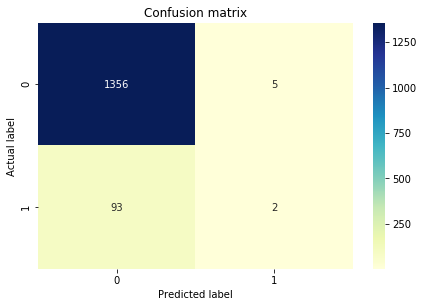

In [46]:
# Visualize the confusion matrix by using a heatmap
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
# model evaluation by accuracy, precission and Recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9326923076923077
Precision: 0.2857142857142857
Recall: 0.021052631578947368


The accuracy is good, precision is low, and the recall is really low. So, logistic regression doesn't turn out to be a strong model.

In [48]:
# accuracy = tp+tn/tp+tn + fp+fn (tn, fp, fn, tp)
# precision = tp/tp+fp - if predicted to be positive, what is the prob that it is true?
# recall = tp/tp+fn -  out of total positive cases, how many are predicted as positive? also known
# as true positive rate. Look for true negative rate too.
#a b// c, d sencitivity = d/c+d,  tp/tp+fn , specificity = a/a+b, tn/tn+fp
#X.values
#y.values

 Since it is an unbalanced data, we try Upsampling and Downsampling

In [49]:
# Upsampling
from imblearn.over_sampling import SMOTE

In [50]:
print(y_train.value_counts()) # count the numbers of 0 and 1 before sampling
smt = SMOTE()
X_train1, y_train1 = smt.fit_sample(X_train, y_train)
y_train.value_counts()
print(np.bincount(y_train1)) # count the numbers of 0 and 1 after sampling

0    4113
1     253
Name: CARAVAN Number of mobile home policies 0 - 1, dtype: int64
[4113 4113]


In [58]:
logreg.fit(X_train1,y_train1) # fit the data
y_pred = logreg.predict(X_test) 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
y_test.value_counts()

C:\Users\sabin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[1287   74]
 [  77   18]]


0    1361
1      95
Name: CARAVAN Number of mobile home policies 0 - 1, dtype: int64

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9114010989010989
Precision: 0.19642857142857142
Recall: 0.11578947368421053


Better than before.

In [79]:
#final_pred = logreg.predict(X_testset)
#import collections
#collections.Counter(final_pred)

In [80]:
# Now, do down sampling applying NearMiss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_train2, y_train2 = nr.fit_sample(X_train, y_train)
np.bincount(y_train2)

logreg.fit(X_train2, y_train2) # fit the data
y_pred = logreg.predict(X_test) 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[469 892]
 [ 30  65]]


C:\Users\sabin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
# model evaluation by accuracy, precission and Recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.36675824175824173
Precision: 0.06792058516196448
Recall: 0.6842105263157895


Better than before in recall but worse in accuracy and precision

In [82]:
#final_pred = logreg.predict(X_testset)
#import collections
#collections.Counter(final_pred)

In [33]:
## Neural network in Keras
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
n_cols = df.shape[1]-1
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from time import time
# create baseline model
def create_baseline(optimizer='rmsprop', init = 'uniform'):
    model = Sequential()
    model.add(Dense(85, activation='relu', input_dim=n_cols))
    model.add(Dense(85, activation='relu')) # An "activation" is just a non-linear function applied to the output
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # This special "softmax" a
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model


In [38]:
# Hyperparameter tuning by GridsearchCV
start = time()
model = KerasClassifier(build_fn=create_baseline, verbose = 0)

inits = ['glorot_uniform', 'normal']
optimizers = ['rmsprop', 'adam']
epochs = np.array([60])
batches = np.array([10])

param_dict = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_dict)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#for params, mean_score, scores in grid_result.grid_scores_:
#    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))
print("total time:",time()-start)
best_epochs = grid_result.best_params_['epochs']
best_batch_size = grid_result.best_params_['batch_size']
best_init = grid_result.best_params_['init']
best_optimizer = grid_result.best_params_['optimizer']

C:\Users\sabin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.942052 using {'batch_size': 10, 'epochs': 60, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
total time: 960.1043825149536


GridsearchCV is very slow, so we tune the hyperparameters manually.

In [ ]:
# do it manually
best_epochs = 60
best_batch_size = 10
best_init = 'glorot_uniform'
best_optimizer = 'adam'
# Now create a classifier with manually chosen parameters
classifier_pred = KerasClassifier(build_fn=create_baseline, optimizer=best_optimizer, init=best_init, epochs=best_epochs, batch_size=best_batch_size, verbose=1)
classifier_pred.fit(X_train, y_train)

Epoch 1/60
4366/4366 [==============================] - 7s 2ms/step - loss: 0.2244 - acc: 0.9421
Epoch 2/60
4366/4366 [==============================] - 2s 566us/step - loss: 0.2080 - acc: 0.9421
Epoch 3/60
4366/4366 [==============================] - 2s 521us/step - loss: 0.2017 - acc: 0.9421
Epoch 4/60
4366/4366 [==============================] - 2s 549us/step - loss: 0.1979 - acc: 0.9421
Epoch 5/60
4366/4366 [==============================] - 3s 711us/step - loss: 0.1943 - acc: 0.9421
Epoch 6/60
4366/4366 [==============================] - 5s 1ms/step - loss: 0.1944 - acc: 0.9421
Epoch 7/60
4366/4366 [==============================] - 5s 1ms/step - loss: 0.1907 - acc: 0.9425
Epoch 8/60
4366/4366 [==============================] - 4s 1ms/step - loss: 0.1873 - acc: 0.9418
Epoch 9/60
4366/4366 [==============================] - 5s 1ms/step - loss: 0.1851 - acc: 0.9432
Epoch 10/60
4366/4366 [==============================] - 4s 1ms/step - loss: 0.1802 - acc: 0.9434
Epoch 11/60
4366/4366

In [ ]:
y_pred=classifier_pred.predict(X_test)
## calculate model performance
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Logistic regression with upsampling is the best model so far.